In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def average(data, n):
    """ Moyenne les valeurs de data par paquets de taille n"""
    databis = data[len(data)%n:]
    return databis.reshape(len(data)//n, n).mean(axis=1)

In [4]:
a = np.arange(37)
average(a, 3)

array([ 2.,  5.,  8., 11., 14., 17., 20., 23., 26., 29., 32., 35.])

In [6]:
def allan_variance_simple(data, n):
    data_moy = average(data, n)
    data_diff = data_moy[1:] - data_moy[:-1]
    sigma_deux = np.mean(data_diff**2) /2
    return sigma_deux

allan_variance_simple(np.arange(37), 1)

0.5

In [7]:
def allan_variance(data):
    n_max = int(np.log2(len(data)))-1
    Tn = 2**np.arange(n_max)
    return Tn, np.array([allan_variance_simple(data, n) for n in Tn])

In [14]:
def usual_variance(data):
    n_max = int(np.log2(len(data)))-1
    Tn = 2**np.arange(n_max)
    return Tn, np.array([np.var(average(data, n)) for n in Tn])

## Exemple

In [15]:
from numpy.random import normal

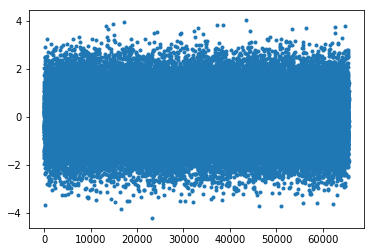

In [17]:
data = normal(size=2**16)
plt.plot(data, '.')

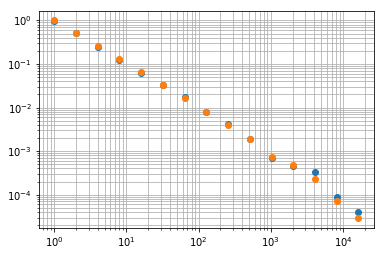

In [19]:
data = normal(size=2**16)
Tn, allan_var = allan_variance(data)
plt.loglog(Tn , allan_var, 'o')
Tn, usual_var = usual_variance(data)
plt.loglog(Tn , usual_var, 'o')
plt.grid(which='both')


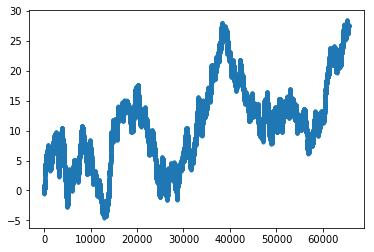

In [23]:
data = 0.1*np.cumsum(np.random.normal(size=2**16))
plt.plot(data, '.')

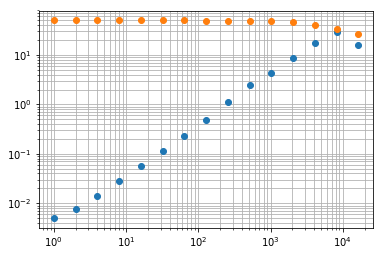

In [24]:
Tn, allan_var = allan_variance(data)
plt.loglog(Tn , allan_var, 'o')
Tn, usual_var = usual_variance(data)
plt.loglog(Tn , usual_var, 'o')
plt.grid(which='both')


In [26]:
print(allan_var[0])

0.005000348507002547


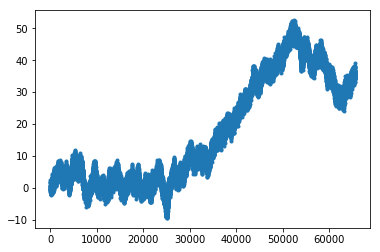

In [27]:
data = 0.1*np.cumsum(np.random.normal(size=2**16)) + normal(size=2**16)

plt.plot(data, '.')

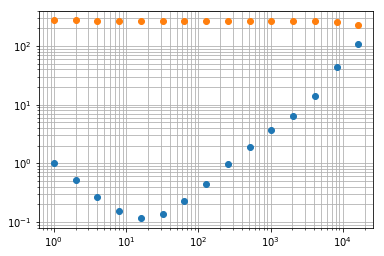

In [28]:
Tn, allan_var = allan_variance(data)
plt.loglog(Tn , allan_var, 'o')
Tn, usual_var = usual_variance(data)
plt.loglog(Tn , usual_var, 'o')
plt.grid(which='both')


## Température

In [31]:
data = np.loadtxt('temperature_londres.dat')

Text(0,0.5,'Temperature [°C]')

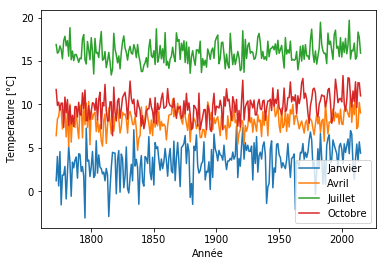

In [40]:
annees = data[:, 0]
janvier = data[:, 1]
avril = data[:, 4]
juillet = data[:, 7]
octobre = data[:, 10]

plt.plot(annees, janvier, label='Janvier')
plt.plot(annees, avril, label='Avril')
plt.plot(annees, juillet, label='Juillet')
plt.plot(annees, octobre, label='Octobre')
plt.legend(loc='best')
plt.xlabel('Année')
plt.ylabel('Temperature [°C]')

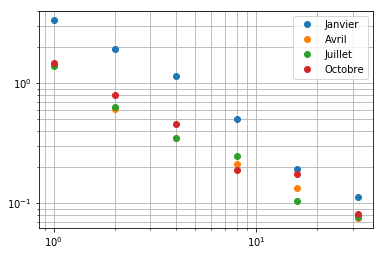

In [44]:
Tn, allan_var = allan_variance(janvier)
plt.loglog(Tn , allan_var, 'o', label='Janvier')
Tn, allan_var = allan_variance(avril)
plt.loglog(Tn , allan_var, 'o', label='Avril')
Tn, allan_var = allan_variance(juillet)
plt.loglog(Tn , allan_var, 'o', label='Juillet')
Tn, allan_var = allan_variance(octobre)
plt.loglog(Tn , allan_var, 'o', label='Octobre')
plt.legend(loc='best')
plt.grid(which='both')

## CAC 40

In [45]:
bourse = np.loadtxt("cac_40.csv", skiprows=4, delimiter=',', usecols=3, converters={3:eval})

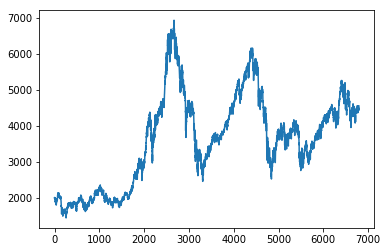

In [48]:
plt.plot(bourse)

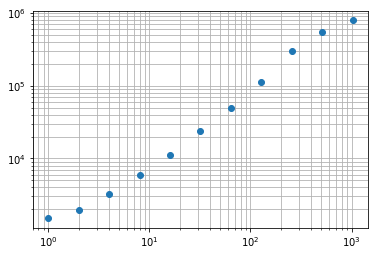

In [50]:
Tn, allan_var = allan_variance(bourse)
plt.loglog(Tn , allan_var, 'o')
plt.grid(which='both')